<!-- @format -->

# 1 创建项目环境步骤

- 1、安装 anaconda，并配置环境变量
- 2、创建虚拟环境 conda create -n myenv python=3.9
- 3、激活虚拟环境 conda activate myenv
- 4、安装相关包 pip install -r requirements.txt


<!-- @format -->

# 2 数据准备


<!-- @format -->

## 2.1 导入必要库和包


In [1]:
import pandas as pd
import numpy as np
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<!-- @format -->

## 2.2 读取数据集

- 该数据集关注放射性碘（RAI）治疗后的甲状腺癌复发。它包含 383 个患者记录，具有 13 个关键属性，包括年龄，性别，癌症分期，病理类型，风险分类，治疗反应和复发状态。这些数据对于预测癌症复发，了解风险因素和评估治疗结果很有价值。

数据集包含以下列：

- Age: 年龄
- Gender: 性别
- Hx Radiotherapy: 是否接受放疗
- Adenopathy: 腺病（淋巴结肿大）情况
- Pathology: 病理类型
- Focality: 病灶集中度
- Risk: 风险等级
- T: 原发肿瘤的大小和/或扩散程度
- N: 区域淋巴结受累情况
- M: 远处转移情况
- Stage: 癌症分期
- Response: 对治疗的反应
- Recurred: 是否复发


In [2]:
# 读取csv格式数据，header=0表示第一行是列名，encoding='utf-8'表示使用utf-8编码
df = pd.read_csv('filtered_thyroid_data.csv',header=0,encoding='utf-8')
# 提取特征数据列名
columns = df.columns.tolist()[:-1]
df.head(15)


,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


<!-- @format -->

## 2.3 对数据进行初步探索，包括查看数据集的形状，数据类型，缺失值情况等。


In [3]:
# 显示数据集的形状，即数据集中样本的数量和特征的数量。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


In [4]:
# 统计各类特征的数据的缺失值情况
print("数据缺失情况:")
print(df.isnull().sum())
print("*"*80)

# 计算每个特征的缺失值占总样本量的比例
missing_values_count = df.isnull().sum()
missing_values_ratio = missing_values_count / len(df) * 100
print("数据缺失比例情况:")
print(missing_values_ratio)
print("*"*80)

# 统计重复样本的个数
duplicate_count = df.duplicated().sum()
print("数据重复情况:",duplicate_count)
print("*"*80)

数据缺失情况:
Age                0
Gender             0
Hx Radiothreapy    0
Adenopathy         0
Pathology          0
Focality           0
Risk               0
T                  0
N                  0
M                  0
Stage              0
Response           0
Recurred           0
dtype: int64
********************************************************************************
数据缺失比例情况:
Age                0.0
Gender             0.0
Hx Radiothreapy    0.0
Adenopathy         0.0
Pathology          0.0
Focality           0.0
Risk               0.0
T                  0.0
N                  0.0
M                  0.0
Stage              0.0
Response           0.0
Recurred           0.0
dtype: float64
********************************************************************************
数据重复情况: 53
********************************************************************************


<!-- @format -->

# 3 数据预处理


<!-- @format -->

## 3.1 文本标签映射


In [5]:
# 去除不存在标签的样本
df = df.dropna(subset=['Recurred'])
# 对标签进行映射编码
label, unique_label = pd.factorize(df['Recurred'])
label_dict = {label: idx for idx, label in enumerate(unique_label)}
# 将文字标签转化为数字标签，并添加到数据集中，此时的df的标签已经转化为数字标签
df['label'] = label
print("*"*50)
print("各类标签统计：",df["Recurred"].unique())
# 直接输出标签的个数，即分类的个数
print("*"*50)
print("分类数量：",df["Recurred"].nunique())
print("*"*50)
print("标签映射字典:",label_dict)

**************************************************
各类标签统计： ['No' 'Yes']
**************************************************
分类数量： 2
**************************************************
标签映射字典: {'No': 0, 'Yes': 1}


In [6]:
# 特征矩阵，不包含目标变量。df中去除target列以外的列就是特征。
X = df.drop(['Recurred','label'], axis=1) 
# df的label列是目标变量
y = df['label']

<!-- @format -->

## 3.2 划分训练集和验证集


In [7]:
# train_test_split用于划分训练集和验证集
# test_size=0.3 这个参数就代表30%的样本做验证集
# random_state参数设置随机数种子，保证每次切分运行结果一致。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("训练集样本数量：", X_train.shape[0])
print("测试集样本数量：", X_test.shape[0])

训练集样本数量： 268
测试集样本数量： 115


<!-- @format -->

## 3.3 针对不同特征进行编码处理


In [8]:
# 检测特征数据的类型，将分类特征数据进行编码
# categorical_features用于存储分类型特征字段名称
categorical_features = [] 
# continuous_features用于存储连续型特征字段名称
continuous_features = []
for column in X.columns:
    # 检查是否为字符串类型（通常为分类特征）
    if df[column].dtype == 'object':
        categorical_features.append(column)
    # 将其他类型视为连续特征
    else:
        continuous_features.append(column)
print("分类特征:", categorical_features)
print("连续特征:", continuous_features)

分类特征: ['Gender', 'Hx Radiothreapy', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
连续特征: ['Age']


In [9]:
X_train

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
335,29,M,No,Extensive,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete
140,28,F,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent
132,32,F,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent
253,38,F,No,No,Follicular,Multi-Focal,Low,T3a,N0,M0,I,Biochemical Incomplete
153,63,F,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete
...,...,...,...,...,...,...,...,...,...,...,...,...
71,69,F,No,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent
106,26,F,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent
270,39,F,No,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Indeterminate
348,58,F,No,Extensive,Papillary,Multi-Focal,Intermediate,T3b,N1b,M0,II,Structural Incomplete


In [10]:

encoded_train = X_train.copy()
encoded_test = X_test.copy()
encoders = {}  # 用于保存每个特征的编码器
mapping_dicts = {}  # 用于保存每个特征的映射字典

for feature in categorical_features:
    # 创建标签编码器
    encoder = LabelEncoder()
    
    # 对训练集进行拟合和转换
    encoder.fit(encoded_train[feature])
    
    # 将训练集中的类别与未知类别合并，确保编码器可以处理未知类别
    unique_classes = list(encoder.classes_) + ['Unknown']
    encoder.classes_ = np.array(unique_classes)
    
    # 对训练集进行转换
    encoded_train[feature] = encoder.transform(encoded_train[feature])
    
    # 对验证集进行转换，处理未知类别
    encoded_test[feature] = encoded_test[feature].apply(lambda x: x if x in encoder.classes_[:-1] else 'Unknown')
    encoded_test[feature] = encoder.transform(encoded_test[feature])
    
    # 保存编码器
    encoders[feature] = encoder
    
    # 提取映射字典
    mapping = {cls: idx for idx, cls in enumerate(encoder.classes_)}
    mapping_dicts[feature] = mapping

# 保存分类特征的映射字典
with open('./models/mapping_dicts.pkl', 'wb') as f:
    pickle.dump(mapping_dicts, f)

<!-- @format -->

## 3.4 对训练集和测试集进行简单可视化分析


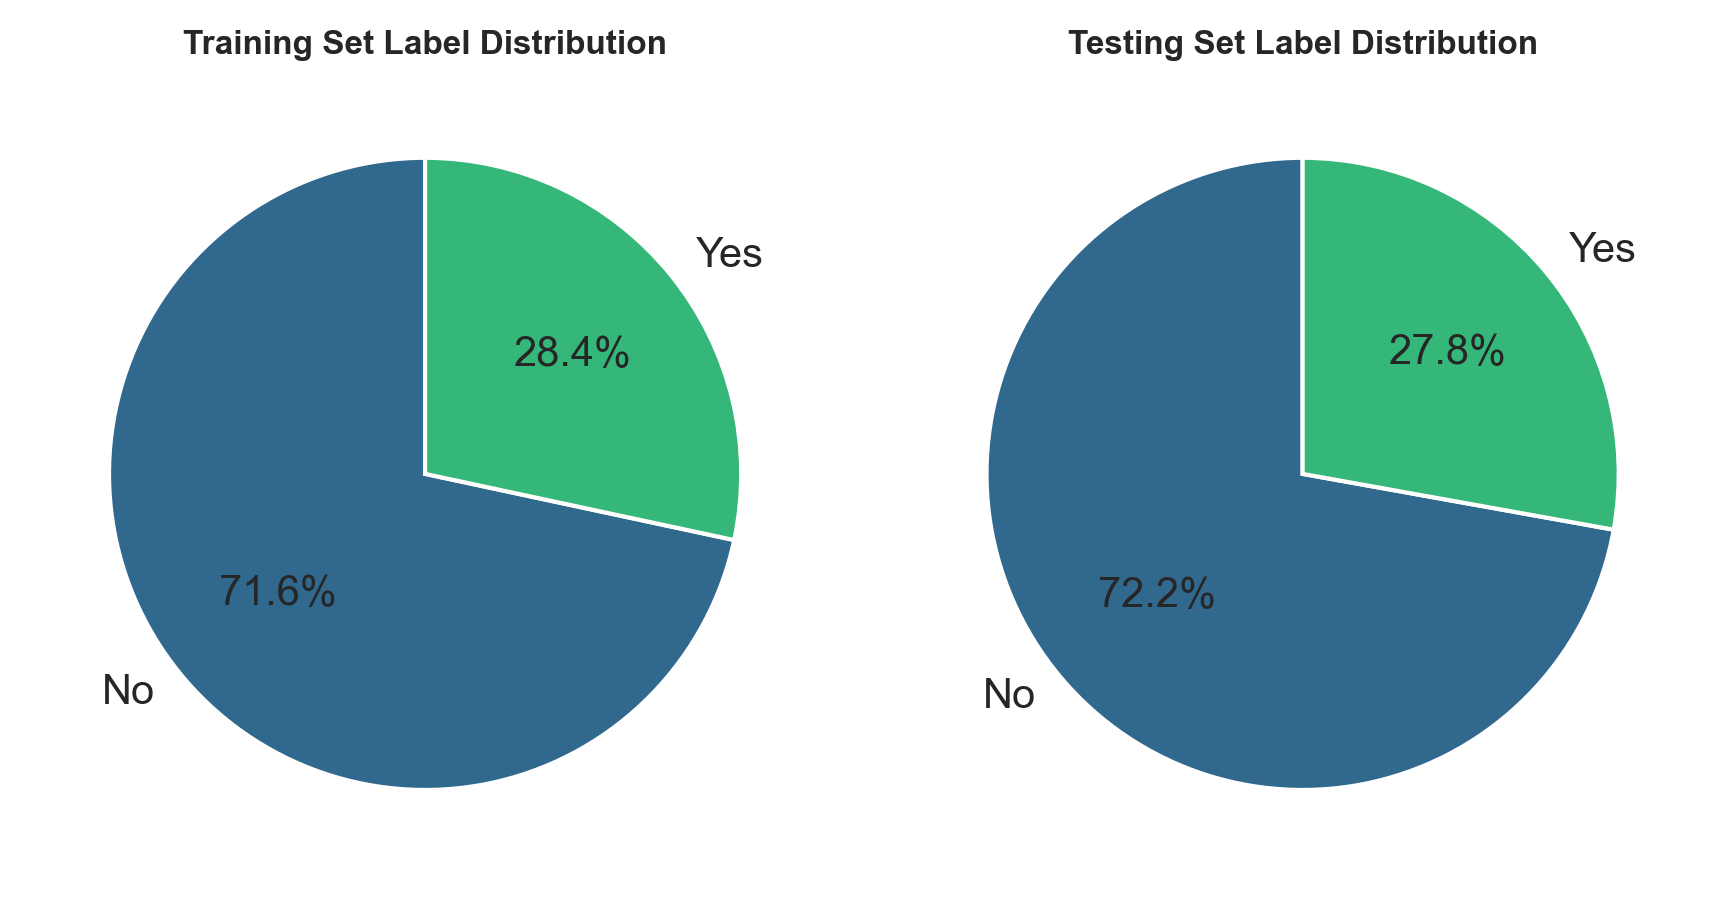

In [11]:
# 反转键值对，为了可视化更清晰，使用标签作为标注
reversed_label_dict = {v: k for k, v in label_dict.items()}
# 计算训练集和测试集的标签占比
train_counts = y_train.value_counts(normalize=True).sort_index()
test_counts = y_test.value_counts(normalize=True).sort_index()

# 使用字典映射标签名称
train_labels = [reversed_label_dict[idx] for idx in train_counts.index]
test_labels = [reversed_label_dict[idx] for idx in test_counts.index]

# 创建图表
plt.figure(figsize=(6, 3), dpi=300)
sns.set_style("whitegrid")

# 绘制训练集饼图
plt.subplot(1, 2, 1)
train_pie = plt.pie(
    train_counts,
    labels=train_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(train_counts)),
    textprops={'fontsize': 10}
)
plt.title("Training Set Label Distribution", fontsize=8, fontweight="bold")

# 绘制测试集饼图
plt.subplot(1, 2, 2)
test_pie = plt.pie(
    test_counts,
    labels=test_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(test_counts)),
    textprops={'fontsize': 10}
)
plt.title("Testing Set Label Distribution", fontsize=8, fontweight="bold")

# 调整布局
plt.tight_layout()

# 保存图表
# plt.savefig("label_distribution_pie.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [12]:
test_labels

['No', 'Yes']

In [99]:
encoded_train

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
335,29,1,0,1,3,0,1,3,2,0,0,3
140,28,0,0,3,3,1,2,2,0,0,0,1
132,32,0,0,3,3,1,2,2,0,0,0,1
253,38,0,0,3,0,0,2,3,0,0,0,0
153,63,0,0,3,3,1,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,69,0,0,3,3,1,2,1,0,0,0,1
106,26,0,0,3,3,1,2,2,0,0,0,1
270,39,0,0,3,3,1,2,3,0,0,0,2
348,58,0,0,1,3,0,1,4,2,0,1,3


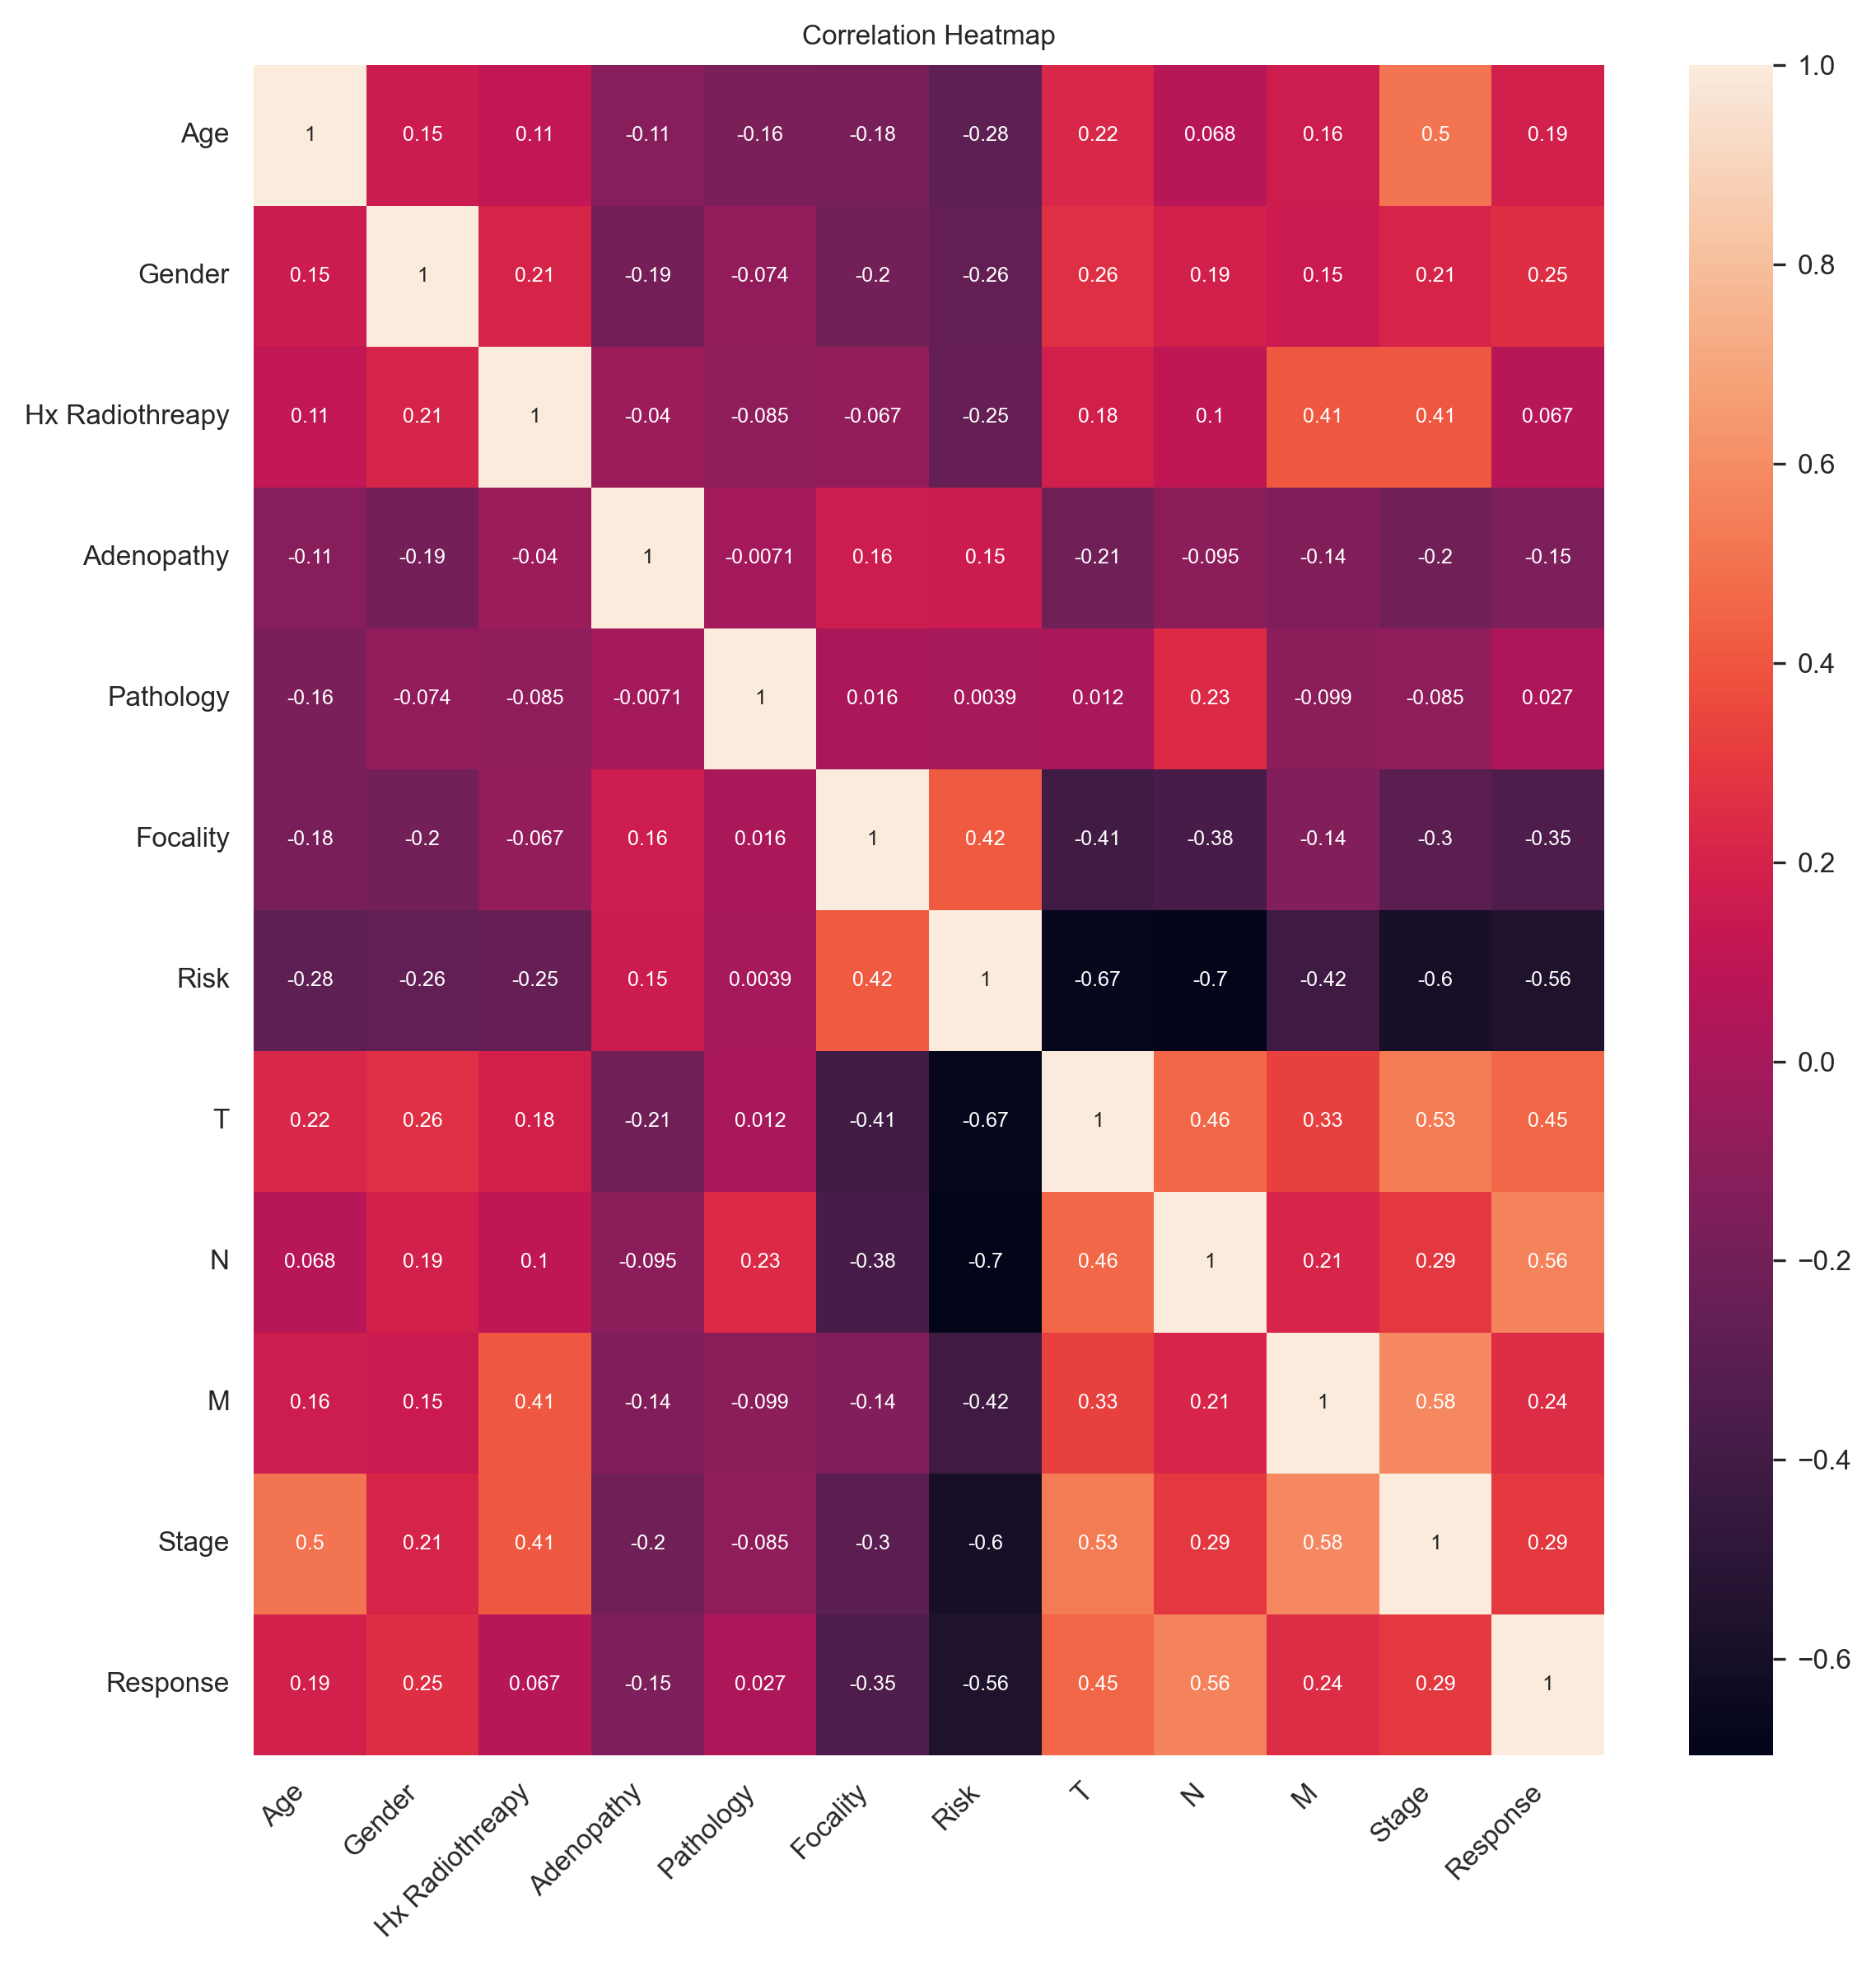

In [100]:
# 设置字体为 Arial（适合科研图表）
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 8  # 设置全局字体大小
plt.figure(figsize=(8, 8), dpi=300)
# 计算相关性矩阵
heat_corr=encoded_train.corr()
sns.heatmap(heat_corr, annot=True, annot_kws={"fontsize": 6})
# 设置标题和字体大小
plt.title('Correlation Heatmap',fontsize=8)
# 设置横坐标角度和字体大小
xticks = plt.xticks()
plt.xticks(xticks[0], xticks[1], rotation=45, ha='right', fontsize=8)
# 设置横坐标字体大小
plt.yticks(fontsize=8) 
# 调整字体避免重叠
plt.tight_layout()
plt.show()

<!-- @format -->

## 3.5 箱线图异常值检测


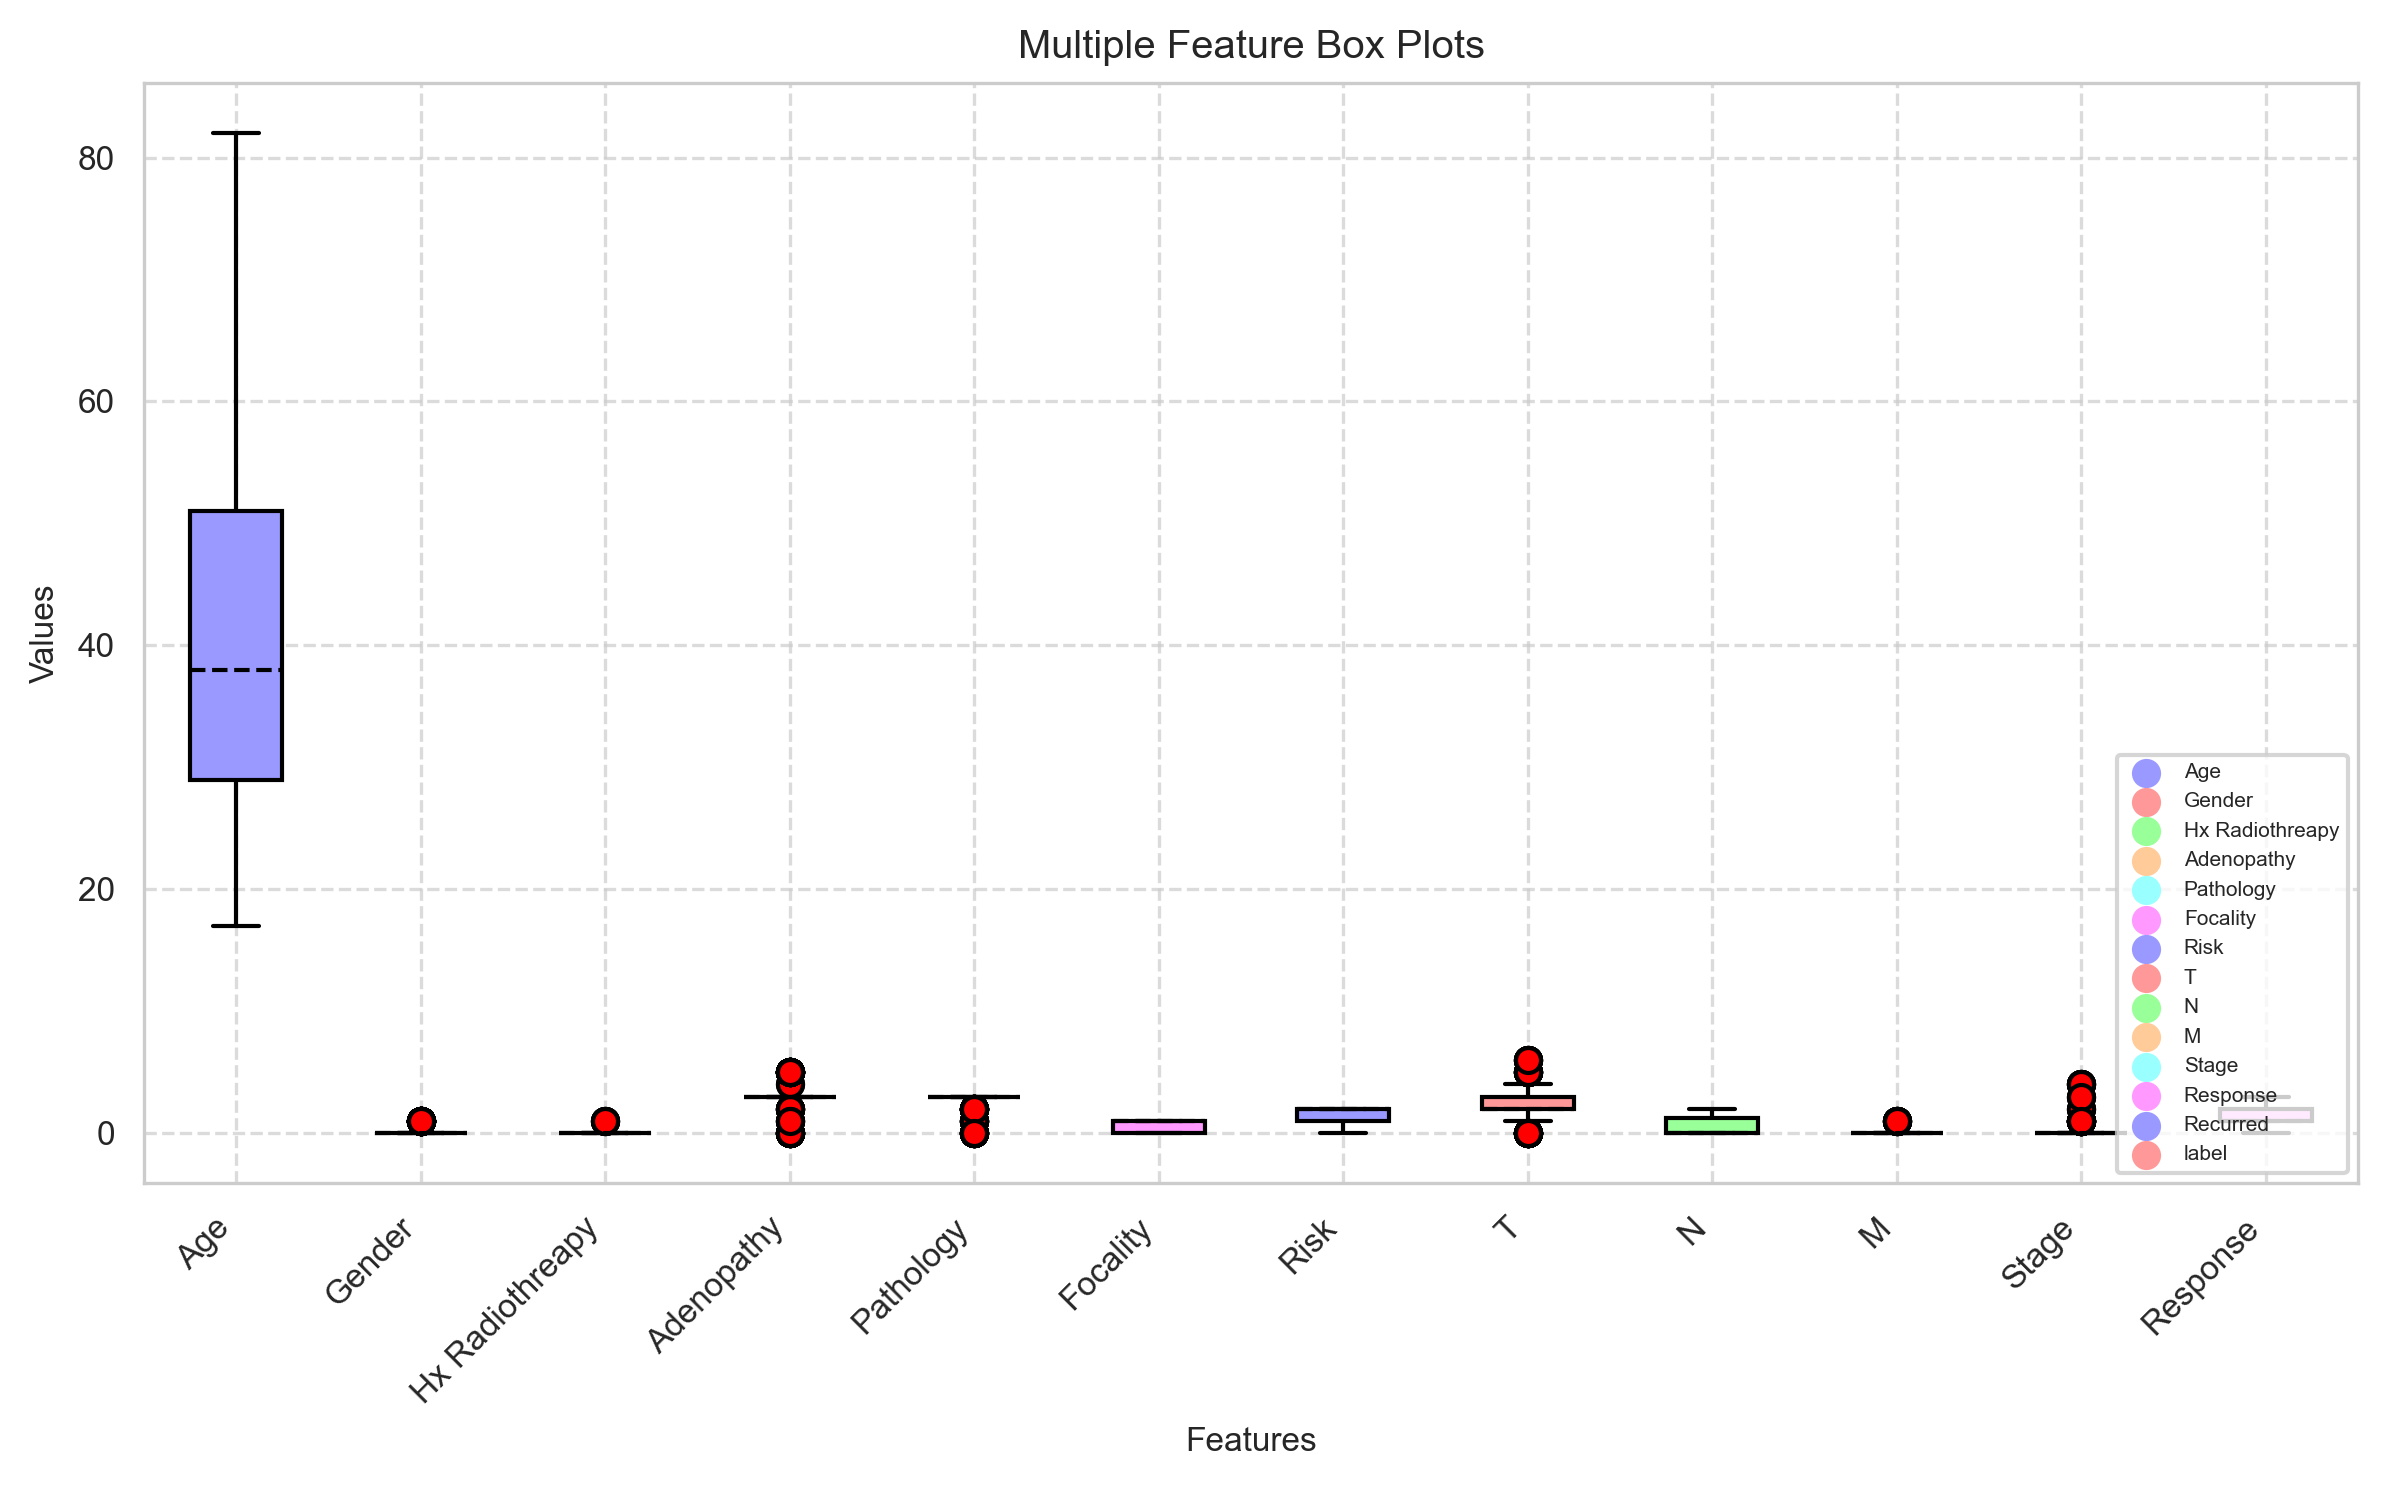

In [101]:
# 标准化和异常值检测的顺序是具体情况而定
# 如果先标准化再检测异常值，那么检测到的异常值会受标准化影响，所以通常先检测异常值，再标准化
# 对训练集通过箱线图进行异常值检测,由于尺度问题，可能一部分特征那个的箱线图会比较集中，看不太出来
# 设置字体和防止中文标签乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 创建一个包含多个特征的箱线图
plt.figure(figsize=(8, 5),dpi=300)
sns.set_style("whitegrid")
# 遍历每个特征并绘制箱线图
box_df= pd.DataFrame(encoded_train,columns=columns)
colors = ['#9999ff', '#ff9999', '#99ff99', '#ffcc99', '#99ffff', '#ff99ff']
for i, feature in enumerate(box_df.columns):
    plt.boxplot(
        x=box_df[feature],
        widths=0.5,  # 箱线宽度
        positions=[i],  # 设置箱线图的位置
        patch_artist=True,  # 箱体颜色
        # showmeans=True,     # 显示均值
        boxprops={'color': 'black', 'facecolor': colors[i % len(colors)]},  # 设置箱体属性
        flierprops={'marker': 'o', 'markerfacecolor': 'red', 'color': 'black'},  # 设置异常值属性
        # meanprops={'marker': 'o', 'markerfacecolor': 'indianred'},  # 设置均值点的属性
        medianprops={'linestyle': '--', 'color': 'black'}  # 设置中位数线的属性
    )
# 设置标题和标签
plt.title('Multiple Feature Box Plots')
plt.xlabel('Features')
plt.ylabel('Values')
xticks = plt.xticks()
plt.xticks(xticks[0], xticks[1], rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(ticks=range(len(df.columns)), labels=df.columns)  # 设置x轴刻度标签
# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)
# 添加图例
for i, feature in enumerate(df.columns):
    plt.scatter([], [], c=colors[i % len(colors)], label=feature)
plt.legend(loc='lower right',fontsize=5)
plt.tight_layout()
plt.show()

In [102]:
# 使用箱线图法剔除异常值
def remove_outliers_boxplot(df, labels, columns):
    mask = np.ones(len(df), dtype=bool)
    for column in columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = mask & (df[column] >= lower_bound) & (df[column] <= upper_bound)
    outlier_indices = np.where(~mask)[0]  # 获取异常值的索引
    df_filtered = df[mask]
    labels_filtered = labels[mask]
    # 返回结果包括移除异常值后的数据集、标签和异常值的索引
    return df_filtered, labels_filtered, outlier_indices
X_train, y_train,outlier_indices = remove_outliers_boxplot(box_df.reset_index(drop=True),y_train.reset_index(drop=True),box_df.columns)

<!-- @format -->

## 3.7 数据标准化


In [103]:
# 标准化处理不改变数据的分布，只改变数据尺度
# 通常使用Sklearn库中的StandardScaler对数据进行标准化
from sklearn.preprocessing import StandardScaler
# 初始化StandardScaler对象
scaler = StandardScaler()
# 用训练数据拟合scaler
scaler.fit(encoded_train)
# 转换训练集和验证集 标准化前的格式是dataframe格式，标准化之后转换成numpy格式X_train_scaled
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(encoded_test)

# 保存标准化模型
dump(scaler, './models/scaler.joblib')

['./models/scaler.joblib']

<!-- @format -->

# 4 模型训练模块


<!-- @format -->

## 4.1 LogisticRegression 模型训练


LogisticRegression模型准确率: 0.9304347826086956
LogisticRegression模型召回准确率: 0.8942018072289157
LogisticRegression模型精确准确率: 0.9298029556650247

逻辑回归分类报告:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        83
           1       0.93      0.81      0.87        32

    accuracy                           0.93       115
   macro avg       0.93      0.89      0.91       115
weighted avg       0.93      0.93      0.93       115

标准答案 [0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0]
预测结果 [0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0]


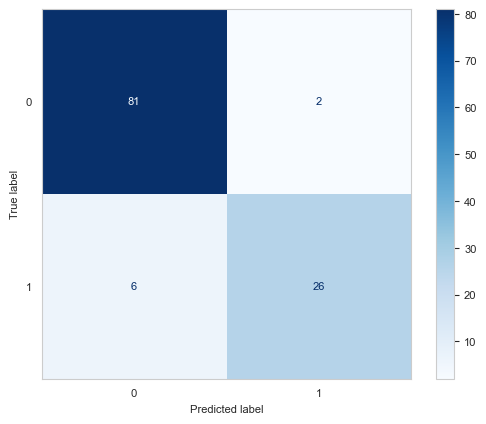

In [104]:
 # 导入准确率和分类报告指标
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report 
from sklearn.linear_model import LogisticRegression  # 导入LogisticRegression模型
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 初始化逻辑回归模型
LogisticRegression_model = LogisticRegression(max_iter=5000)

# 在训练集上训练模型
LogisticRegression_model.fit(X_train_scaled, y_train)

# 在验证集上进行预测
y_pred_lr = LogisticRegression_model.predict(X_test_scaled)

# 计算模型准确率
# test: 这是验证集的真实标签
# pred: 这是刚才逻辑回归模型对验证集中每个样本的预测类别。
# 计算准确率等指标需要真实标签和预测标签。
accuracy_lr = accuracy_score(y_test, y_pred_lr)
# 对于不同分类模型，其计算指标的average参数不同，多分类使用'micro', 'macro', 'weighted'
# 二分类使用[None, 'micro', 'macro', 'weighted']
recall_lr = recall_score(y_test, y_pred_lr,average='macro')
precision_lr = precision_score(y_test, y_pred_lr,average='macro')
print("LogisticRegression模型准确率:", accuracy_lr)
print("LogisticRegression模型召回准确率:", recall_lr)
print("LogisticRegression模型精确准确率:", precision_lr)

# 打印分类报告，包括精确率、召回率、F1分数等指标
#在下一节，决策树中，我展开解释了这个分类报告的含义。
print("\n逻辑回归分类报告:")
print(classification_report(y_test, y_pred_lr))
print("标准答案",y_test.values)
print("预测结果",y_pred_lr)

# 打印混淆矩阵
# 对于二分类模型，输出是2*2矩阵，对于n分类问题，输出是n*n矩阵
# 混淆矩阵展示了模型的预测结果与实际标签之间的对比
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)

# 显示混淆矩阵
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

<!-- @format -->

- 上述混淆矩阵表示，真实标签为 0 的预测正确 81 个，预测错误 2 个
- 真实标签为 1 的预测正确 26 个，预测错误的个数是 6 个


<!-- @format -->

## 4.2 决策树 DecisionTree 分类模型训练


决策树模型准确率: 0.9304347826086956
决策树模型召回率: 0.9134036144578312
决策树模型精确率: 0.9134036144578312

决策树分类报告:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        83
           1       0.88      0.88      0.88        32

    accuracy                           0.93       115
   macro avg       0.91      0.91      0.91       115
weighted avg       0.93      0.93      0.93       115



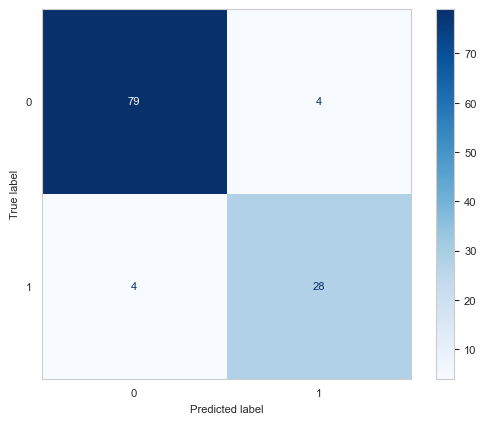

In [105]:
from sklearn.tree import DecisionTreeClassifier

# 初始化决策树模型
dt_model = DecisionTreeClassifier(random_state=42)

# 在训练集上训练模型
dt_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_dt = dt_model.predict(X_test_scaled)

# 评估模型性能
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
precision_dt = precision_score(y_test, y_pred_dt, average='macro')

print("决策树模型准确率:", accuracy_dt)
print("决策树模型召回率:", recall_dt)
print("决策树模型精确率:", precision_dt)
print("\n决策树分类报告:")
print(classification_report(y_test, y_pred_dt))

dt_cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()


<!-- @format -->

## 4.3 支持向量机 SVC 分类模型训练


支持向量机模型准确率: 0.7478260869565218
支持向量机模型召回率: 0.5756777108433735
支持向量机模型精确率: 0.7106918238993711

支持向量机分类报告:
              precision    recall  f1-score   support

           0       0.75      0.96      0.85        83
           1       0.67      0.19      0.29        32

    accuracy                           0.75       115
   macro avg       0.71      0.58      0.57       115
weighted avg       0.73      0.75      0.69       115



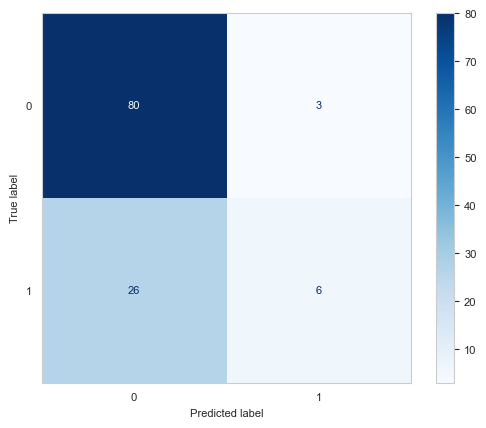

In [106]:
from sklearn.svm import SVC

# 初始化支持向量机模型
svm_model = SVC(probability=True,class_weight='balanced',random_state=42)

# 在训练集上训练模型
svm_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_svm = svm_model.predict(X_test_scaled)

# 评估模型性能
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
precision_svm = precision_score(y_test, y_pred_svm, average='macro')

print("支持向量机模型准确率:", accuracy_svm)
print("支持向量机模型召回率:", recall_svm)
print("支持向量机模型精确率:", precision_svm)
print("\n支持向量机分类报告:")
print(classification_report(y_test, y_pred_svm))

svm_cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

<!-- @format -->

## 4.3 随机森林 RandomForest 分类模型训练


随机森林模型准确率: 0.8608695652173913
随机森林模型召回率: 0.7596009036144578
随机森林模型精确率: 0.8949026345933562

随机森林分类报告:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        83
           1       0.94      0.53      0.68        32

    accuracy                           0.86       115
   macro avg       0.89      0.76      0.80       115
weighted avg       0.87      0.86      0.85       115



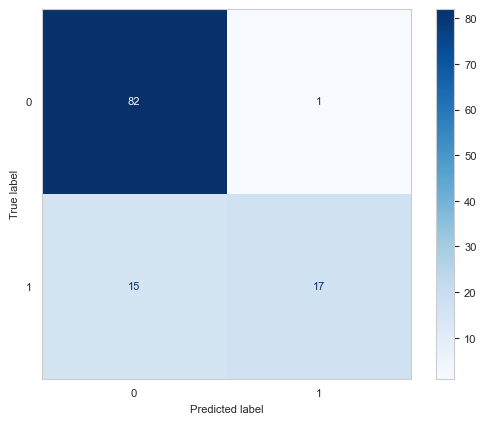

In [107]:
from sklearn.ensemble import RandomForestClassifier

# 初始化随机森林模型
rf_model = RandomForestClassifier(random_state=42)

# 在训练集上训练模型
rf_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_rf = rf_model.predict(X_test_scaled)

# 评估模型性能
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
precision_rf = precision_score(y_test, y_pred_rf, average='macro')

print("随机森林模型准确率:", accuracy_rf)
print("随机森林模型召回率:", recall_rf)
print("随机森林模型精确率:", precision_rf)
print("\n随机森林分类报告:")
print(classification_report(y_test, y_pred_rf))

rf_cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()


<!-- @format -->

## 4.4 K 近邻 KNN 分类模型训练


K近邻模型准确率: 0.7478260869565218
K近邻模型召回率: 0.546875
K近邻模型精确率: 0.8705357142857143

K近邻分类报告:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        83
           1       1.00      0.09      0.17        32

    accuracy                           0.75       115
   macro avg       0.87      0.55      0.51       115
weighted avg       0.81      0.75      0.66       115



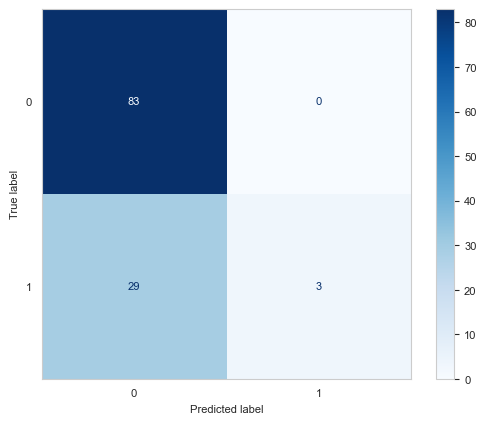

In [108]:
from sklearn.neighbors import KNeighborsClassifier

# 初始化K近邻模型
knn_model = KNeighborsClassifier(n_neighbors=3)

# 在训练集上训练模型
knn_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_knn = knn_model.predict(X_test_scaled)

# 评估模型性能
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
precision_knn = precision_score(y_test, y_pred_knn, average='macro')

print("K近邻模型准确率:", accuracy_knn)
print("K近邻模型召回率:", recall_knn)
print("K近邻模型精确率:", precision_knn)
print("\nK近邻分类报告:")
print(classification_report(y_test, y_pred_knn))

knn_cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

<!-- @format -->

## 4.5 朴素贝叶斯 GaussianNB 分类模型训练


朴素贝叶斯模型准确率: 0.8956521739130435
朴素贝叶斯模型召回率: 0.9181099397590362
朴素贝叶斯模型精确率: 0.8621983039791259

朴素贝叶斯分类报告:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92        83
           1       0.74      0.97      0.84        32

    accuracy                           0.90       115
   macro avg       0.86      0.92      0.88       115
weighted avg       0.92      0.90      0.90       115



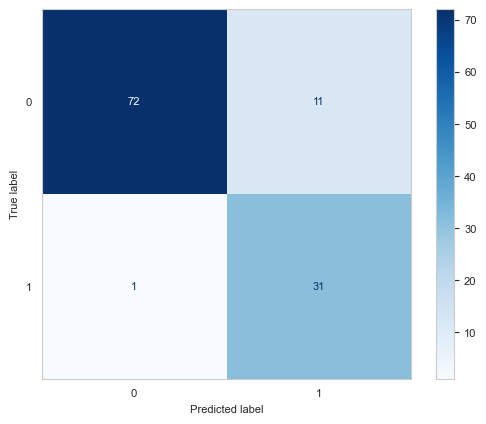

In [109]:
from sklearn.naive_bayes import GaussianNB

# 初始化朴素贝叶斯模型，GaussianNB不涉及随机初始化或随机过程，因此通常不需要设置随机种子。
nb_model = GaussianNB()

# 在训练集上训练模型
nb_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_nb = nb_model.predict(X_test_scaled)

# 评估模型性能
accuracy_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
precision_nb = precision_score(y_test, y_pred_nb, average='macro')

print("朴素贝叶斯模型准确率:", accuracy_nb)
print("朴素贝叶斯模型召回率:", recall_nb)
print("朴素贝叶斯模型精确率:", precision_nb)
print("\n朴素贝叶斯分类报告:")
print(classification_report(y_test, y_pred_nb))

nb_cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

<!-- @format -->

## 4.6 XGBoost 分类模型训练


XGBoost 模型准确率: 0.8
XGBoost 模型召回率: 0.6598268072289157
XGBoost 模型精确率: 0.8201357466063348

XGBoost 分类报告:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88        83
           1       0.85      0.34      0.49        32

    accuracy                           0.80       115
   macro avg       0.82      0.66      0.68       115
weighted avg       0.81      0.80      0.77       115



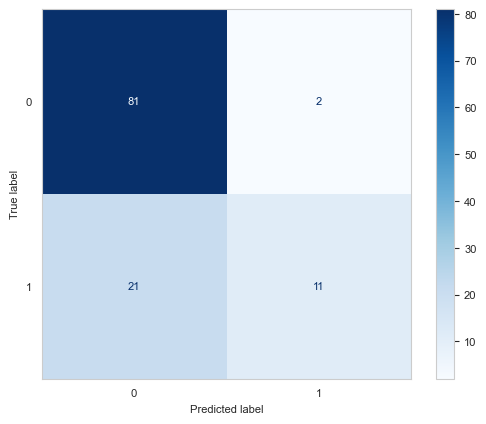

In [110]:
import xgboost as xgb

# 初始化 XGBoost 模型
xgb_model = xgb.XGBClassifier(
    n_estimators=200, # 树的数量，即迭代次数
    learning_rate=0.1, # 学习率，控制每次迭代权重更新的步长
    random_state=42 # 设置随机种子，以便重复性
)

# 训练模型
xgb_model.fit(X_train_scaled, y_train)

# 预测
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 评估性能
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')

print("XGBoost 模型准确率:", accuracy_xgb)
print("XGBoost 模型召回率:", recall_xgb)
print("XGBoost 模型精确率:", precision_xgb)
print("\nXGBoost 分类报告:")
print(classification_report(y_test, y_pred_xgb))

xgb_cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm)

# 显示混淆矩阵
# print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

<!-- @format -->

## 4.7 AdaBoost 分类模型训练


AdaBoost 模型准确率: 0.9565217391304348
AdaBoost 模型召回率: 0.9314759036144578
AdaBoost 模型精确率: 0.9595028067361668

AdaBoost 分类报告:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.97      0.88      0.92        32

    accuracy                           0.96       115
   macro avg       0.96      0.93      0.94       115
weighted avg       0.96      0.96      0.96       115



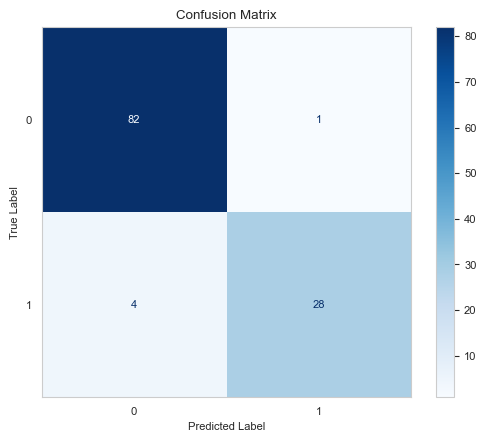

In [111]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 初始化 AdaBoost 模型
# 默认使用 DecisionTreeClassifier 作为弱分类器
ada_model = AdaBoostClassifier(
    n_estimators=50,  # 弱分类器的数量
    learning_rate=1.0,  # 学习率
    random_state=42
)

# 训练模型
ada_model.fit(X_train_scaled, y_train)

# 预测
y_pred_ada = ada_model.predict(X_test_scaled)

# 评估性能
accuracy_ada = accuracy_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada, average='macro')
precision_ada = precision_score(y_test, y_pred_ada, average='macro')

print("AdaBoost 模型准确率:", accuracy_ada)
print("AdaBoost 模型召回率:", recall_ada)
print("AdaBoost 模型精确率:", precision_ada)
print("\nAdaBoost 分类报告:")
print(classification_report(y_test, y_pred_ada))

# 计算混淆矩阵
ada_cm = confusion_matrix(y_test, y_pred_ada)

# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=ada_cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<!-- @format -->

## 4.8 模型 ROC-AUC 指标可视化


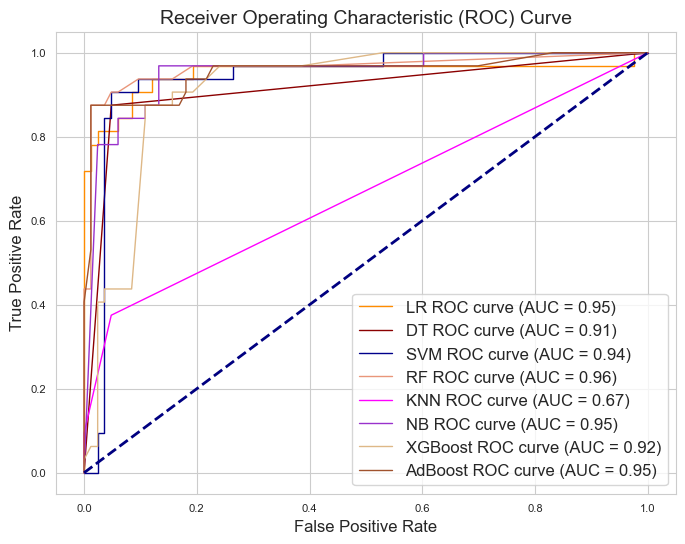

In [112]:
# 绘制二分类和多分类模型的ROC-AUC曲线
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from numpy import interp


# 对于二分类和多分类模型来说，ROC-AUC的可视化是不一样的，要分开绘制
# 多分类模型的ROC曲线是多个一对多曲线的平均。

# 训练模型
# 根据需要计算不同算法的预测概率（正类的概率）
LogisticRegression_y_proba = LogisticRegression_model.predict_proba(X_test_scaled)[:, 1]
dt_y_proba = dt_model.predict_proba(X_test_scaled)[:, 1]
svm_y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
rf_y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
knn_y_proba = knn_model.predict_proba(X_test_scaled)[:, 1]
nb_y_proba = nb_model.predict_proba(X_test_scaled)[:, 1]
ada_y_proba = ada_model.predict_proba(X_test_scaled)[:, 1]
xgb_y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# 计算各类算法的ROC曲线和AUC值
lr_fpr, lr_tpr, _ = roc_curve(y_test, LogisticRegression_y_proba)
lr_roc_auc = auc(lr_fpr, lr_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_proba)
dt_roc_auc = auc(dt_fpr, dt_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_proba)
svm_roc_auc = auc(svm_fpr, svm_tpr)


rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_proba)
rf_roc_auc = auc(rf_fpr, rf_tpr)


knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_proba)
knn_roc_auc = auc(knn_fpr, knn_tpr)


nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_proba)
nb_roc_auc = auc(nb_fpr, nb_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_proba)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)


ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_y_proba)
ada_roc_auc = auc(ada_fpr, ada_tpr)


# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=1, label=f'LR ROC curve (AUC = {lr_roc_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, color='darkred', lw=1, label=f'DT ROC curve (AUC = {dt_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='darkblue', lw=1, label=f'SVM ROC curve (AUC = {svm_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='darksalmon', lw=1, label=f'RF ROC curve (AUC = {rf_roc_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='fuchsia', lw=1, label=f'KNN ROC curve (AUC = {knn_roc_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, color='darkorchid', lw=1, label=f'NB ROC curve (AUC = {nb_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='burlywood', lw=1, label=f'XGBoost ROC curve (AUC = {xgb_roc_auc:.2f})')
plt.plot(ada_fpr, ada_tpr, color='sienna', lw=1, label=f'AdBoost ROC curve (AUC = {ada_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 对角线（随机猜测）
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

<!-- @format -->

## 4.9 保存模型文件


In [113]:
# 保存模型到文件
import joblib
# 把模型保存为一个名为LogisticRegression_model.joblib的文件,就在这个文件夹下
joblib.dump(LogisticRegression_model, './models/LogisticRegression_model.joblib')

# 在后续加载模型和使用模型的时候，也要同时加载数据处理的模块，对数据进行预处理

# 在后续模型的选择中，针对不同的分类任务，选择更看重的评价指标。
# 比如一些分类任务更看重精确率，在最后的模型选择中，选择精确率高的模型作为最后选择的模型。
# 对于最后选择好的模型进行效果的调优，比如调优参数，调优模型结构，调优数据处理方式等。

['./models/LogisticRegression_model.joblib']

<!-- @format -->

# 5 模型调优


<!-- @format -->

## 5.1 引入参数调优的必要模块


In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

<!-- @format -->

## 5.2 使用 GridSearchCV 寻找最佳参数


In [115]:

# 定义参数网格
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 正则化强度的倒数
    'penalty': ['l1', 'l2'],              # 正则化类型
    'solver': ['liblinear', 'saga'],      # 求解器
    'class_weight': [None, 'balanced'],   # 类别权重
    'max_iter': [100, 200, 300]           # 最大迭代次数
}

# 使用网格搜索进行调参
grid_search = GridSearchCV(
    estimator=LogisticRegression_model,
    param_grid=param_grid,
    scoring='f1',  # 或者使用其他评估指标，如 'f1', 'roc_auc'
    cv=5,                # 5 折交叉验证
    n_jobs=-1,           # 使用所有 CPU 核心
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# 查看最佳参数和最佳分数
print("最佳参数：", grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


最佳参数： {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


<!-- @format -->

## 5.3 使用最佳参数重新训练模型


In [124]:
# 直接保存调用最优模型
best_model = grid_search.best_estimator_

# 评估参数最优模型性能
best_y_pred = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, best_y_pred)
best_recall = recall_score(y_test, best_y_pred,average='weighted')
best_precision = precision_score(y_test, best_y_pred,average='weighted')
print("最佳LogisticRegression模型准确率:", best_accuracy)
print("最佳LogisticRegression模型召回准确率:", best_recall)
print("最佳LogisticRegression模型精确准确率:", best_precision)
print("分类报告：\n", classification_report(y_test, best_y_pred))
print("混淆矩阵：\n", confusion_matrix(y_test, best_y_pred))

# 保存模型
joblib.dump(best_model, './models/best_logistic_regression_model.joblib')

最佳LogisticRegression模型准确率: 0.9304347826086956
最佳LogisticRegression模型召回准确率: 0.9304347826086956
最佳LogisticRegression模型精确准确率: 0.9325316598399159
分类报告：
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        83
           1       0.96      0.78      0.86        32

    accuracy                           0.93       115
   macro avg       0.94      0.88      0.91       115
weighted avg       0.93      0.93      0.93       115

混淆矩阵：
 [[82  1]
 [ 7 25]]


['./models/best_logistic_regression_model.joblib']

<!-- @format -->

# 6 最佳模型推理模块


<!-- @format -->

## 6.1 引入模型推理必要的库


In [117]:
import pandas as pd
import numpy as np
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder
import pickle

<!-- @format -->

## 6.2 对推理数据进行编码


In [118]:

# 加载映射字典
with open('./models/mapping_dicts.pkl', 'rb') as f:
    loaded_mapping_dicts = pickle.load(f)

inference_data = pd.read_csv('inference_data.csv')
# 对推理数据进行编码
encoded_inference = inference_data.copy()
for feature in categorical_features:
    mapping = loaded_mapping_dicts[feature]
    # 处理未知类别
    encoded_inference[feature] = encoded_inference[feature].apply(lambda x: x if x in mapping else 'Unknown')
    # 应用映射字典
    encoded_inference[feature] = encoded_inference[feature].map(mapping)

# print("\n推理数据编码结果:")
# print(encoded_inference)

<!-- @format -->

## 6.3 加载模型进行推理


In [119]:
# 加载数据标准化模块
loaded_scaler = joblib.load('./models/scaler.joblib')
# 对推理数据进行标准化处理
scaled_encoded_inference = loaded_scaler.transform(encoded_inference.drop(['Recurred'], axis=1))
# 查看标准化后的推理数据
encoded_inference.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,3,2,1,2,0,0,0,0,2,No
1,34,0,0,3,2,1,2,0,0,0,0,1,No
2,30,0,0,3,2,1,2,0,0,0,0,1,No
3,62,0,0,3,2,1,2,0,0,0,0,1,No
4,62,0,0,3,2,0,2,0,0,0,0,1,No


<!-- @format -->

## 6.4 加载模型调优的最佳模型进行模型推理


In [120]:
# 加载最佳模型进行预测
loaded_model = joblib.load('./models/best_logistic_regression_model.joblib')
y_pred = pd.DataFrame(loaded_model.predict(scaled_encoded_inference), columns=['Predicted'])

# 将预测标签映射为类别名称
pre_result = pd.DataFrame(y_pred['Predicted'].replace({v:k for k,v in label_dict.items()})).rename(columns={'Predicted':'pre_result'})


In [121]:
result = pd.concat([inference_data.reset_index(drop=True),y_pred.reset_index(drop=True),pre_result.reset_index(drop=True)], axis=1)
result

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Predicted,pre_result
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,0,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,0,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,0,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,0,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes,0,No
379,81,M,Yes,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,1,Yes
380,72,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,1,Yes
381,61,M,Yes,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,1,Yes


<!-- @format -->

## 6.5 对推理结果进行保存


In [122]:
# 保存模型推理结果
result.to_csv('result.csv', index=False)
print('模型推理完毕!!')

模型推理完毕!!


<!-- @format -->

## 6.6 模型推理结果可视化


每个主成分的方差贡献率: [0.44808078 0.14353925]


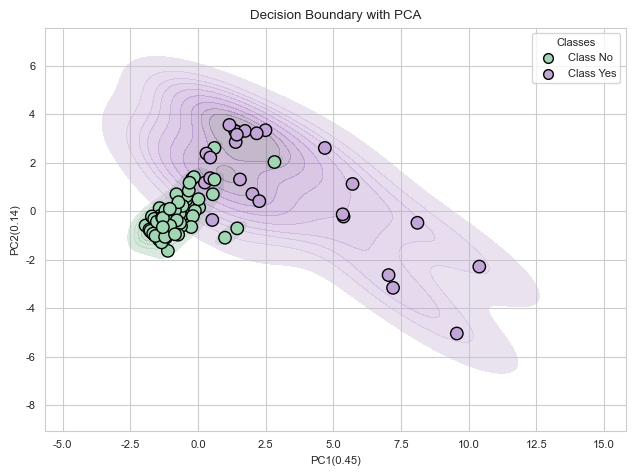

In [123]:
# 将数据通过PCA算法进行降维，将数据从高维空间映射到低维空间，以便于可视化。
# 导入PCA库
from sklearn.decomposition import PCA

# 使用 PCA 将数据降维到2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)
variance_ratio = pca.explained_variance_ratio_
print("每个主成分的方差贡献率:", variance_ratio)
# 定义自定义颜色，对于多分类可以设定多个颜色，当前代码适合二分类和三分类模型
custom_colors = ['#A0D6B4', '#C3A6D8', '#F7CBA3']  # 按类别顺序定义颜色


# 绘制密度图
for i, label in enumerate(np.unique(best_y_pred)):
    subset = X_test_pca[best_y_pred == label]
    sns.kdeplot(x=subset[:, 0], y=subset[:, 1], 
                color=custom_colors[i], shade=True, alpha=0.4, label=f'Density (Class {dict[i]})')



# 绘制散点图
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
                      c=[custom_colors[i] for i in best_y_pred], 
                      edgecolor='black', s=80)

# 添加轴标签和标题
plt.xlabel(f'PC1({variance_ratio[0]:.2f})')
plt.ylabel(f'PC2({variance_ratio[1]:.2f})')
plt.title('Decision Boundary with PCA')

# 添加图例
# 为了在图例中展示类别名称，需要将数字标签映射到对应标签，生成对应dict
label_target_dict = {v:k for k,v in label_dict.items()}
unique_labels = np.unique(best_y_pred)
for i, label in enumerate(unique_labels):
    plt.scatter([], [], color=custom_colors[i], edgecolor='black', s=100, label=f'Class {label_target_dict[i]}')

plt.legend(title="Classes", loc="upper right", markerscale=0.7)

# 调整布局以适应图例
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

<!-- @format -->

### 如果需要进行项目的迁移，使用 pip freeze > requirements.txt 生成项目依赖包，

### 使用 pip install -r requirements.txt 安装依赖包
